## compare HV IV curves

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from os.path import join
from matplotlib.backends.backend_pdf import PdfPages
from epics_utils import get_pv
from datetime import datetime


###################

def read_results(path,ps):
    data = pd.read_csv(join(path, 'rawframe_data.csv'), delimiter=',')
    pvs = np.load(join(path, 'PVdump-prescan.npy'), allow_pickle=True).item()
    
    vhv = pvs['PXD:%s:hv-load:VOLT:cur'%ps][0]
    vbulk = pvs['PXD:%s:bulk-load:VOLT:cur'%ps][0]
    vdrift = pvs['PXD:%s:drift-load:VOLT:cur'%ps][0]
    vclearoff = pvs['PXD:%s:clear-off-load:VOLT:cur'%ps][0]
    
    vhv = np.rint(int(vhv)/1000)
    vbulk = np.rint(int(vbulk)/1000)
    vdrift = np.rint(int(vdrift)/1000)
    vclearoff = np.rint(int(vclearoff)/1000)
    
    return data['PXD:%s:hv-load:VOLT:cur'%ps], data['PXD:%s:hv:CURR:cur'%ps], vhv, vbulk, vdrift, vclearoff
    
###############

1012
1082
'PXD:P1082:hv-load:VOLT:cur'
1022
'PXD:P1022:hv-load:VOLT:cur'
2042
'PXD:P2042:hv-load:VOLT:cur'
1062
'PXD:P1062:hv-load:VOLT:cur'
1072
'PXD:P1072:hv-load:VOLT:cur'
2052
'PXD:P2052:hv-load:VOLT:cur'
1042
'PXD:P1042:hv-load:VOLT:cur'
1052
'PXD:P1052:hv-load:VOLT:cur'
1071
'PXD:P1071:hv-load:VOLT:cur'
1061
'PXD:P1061:hv-load:VOLT:cur'
2051
'PXD:P2051:hv-load:VOLT:cur'
1041
'PXD:P1041:hv-load:VOLT:cur'
1051
'PXD:P1051:hv-load:VOLT:cur'
1011
1031
'PXD:P1031:hv-load:VOLT:cur'
1081
2041
'PXD:P2041:hv-load:VOLT:cur'
1021


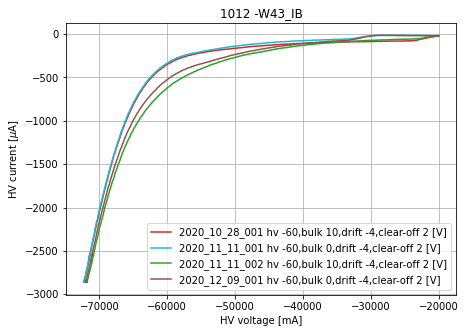

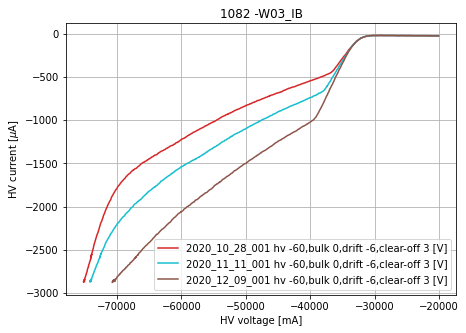

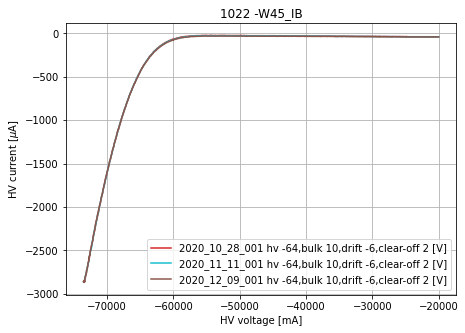

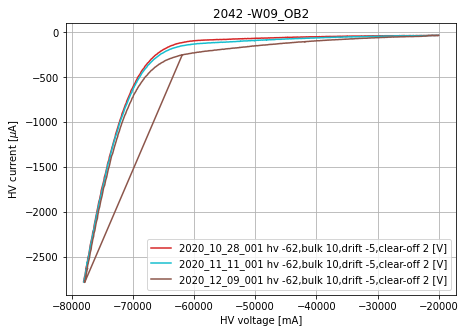

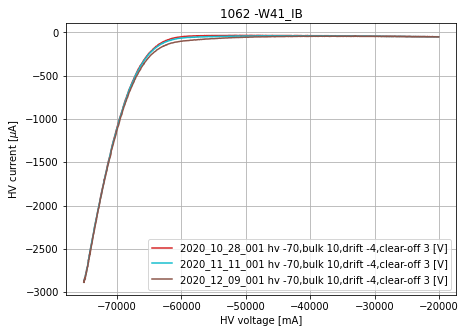

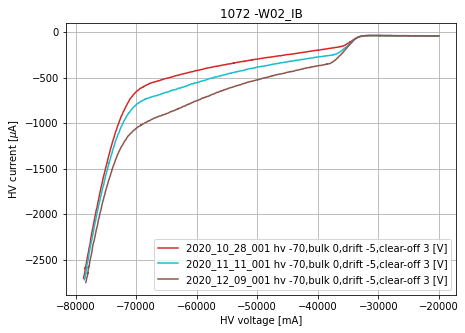

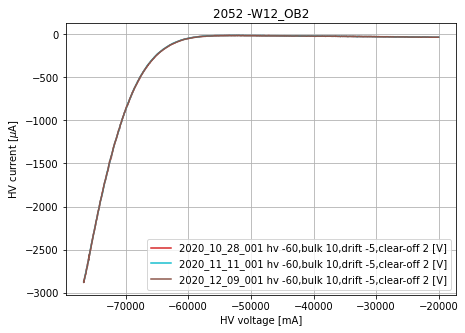

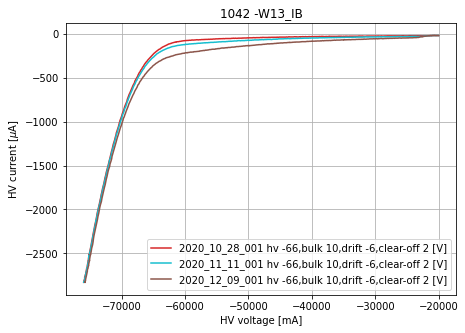

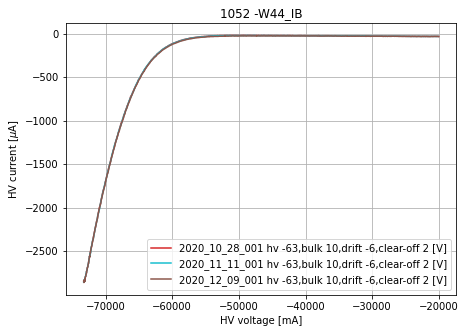

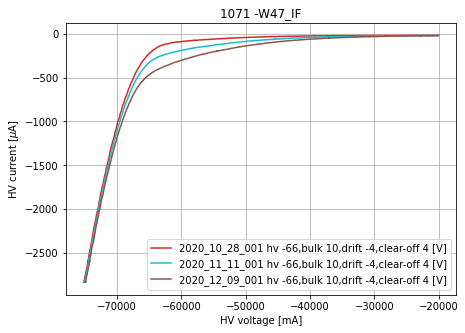

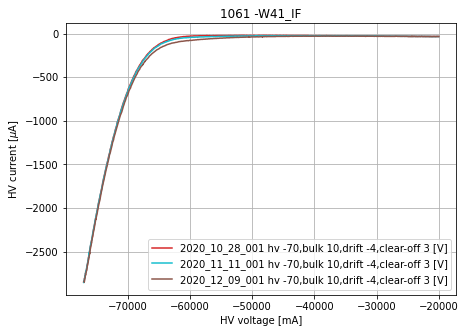

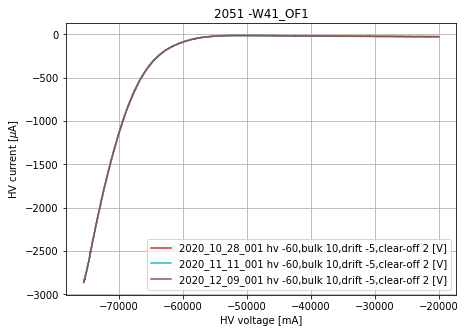

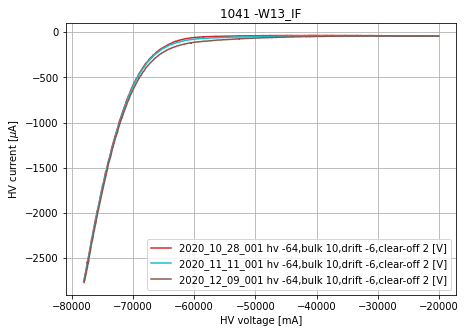

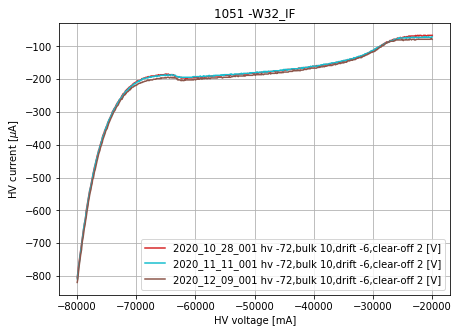

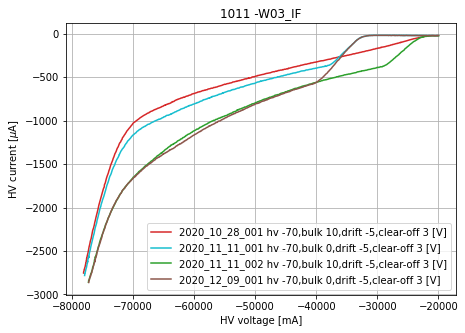

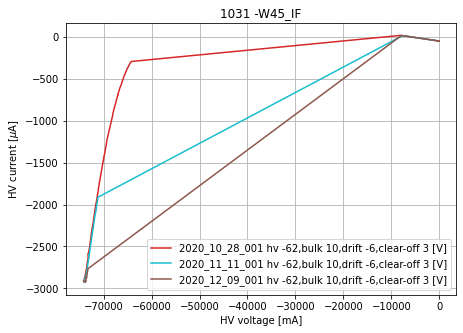

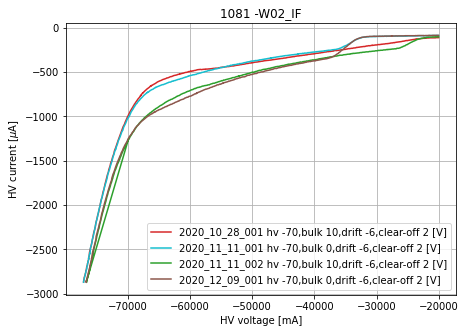

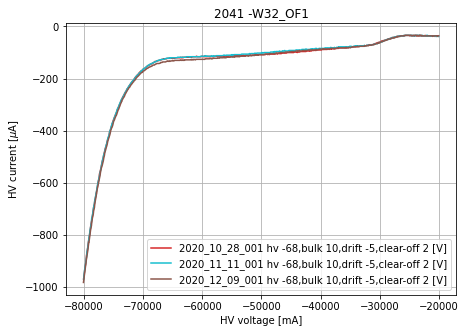

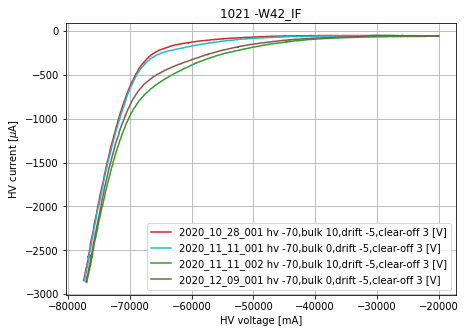

In [10]:
# EXP14, all PS modified before exp14, actual HV curr = 2 x display value

paths = ['/data/commissioning/HV_IV/2020_10_28_001',
        '/data/commissioning/HV_IV/2020_11_11_001',
        '/data/commissioning/HV_IV/2020_11_11_002',
        '/data/commissioning/HV_IV/2020_12_09_001']

figname = 'HV_IV_exp14'

scale = 2


modules = ['1012','1082','1022','2042'
            ,'1062','1072','2052','1042','1052'
            ,'1071','1061','2051','1041','1051'
            ,'1011','1031','1081','2041','1021'
          ]


color = ['tab:red','tab:cyan','tab:green','tab:brown','tab:olive',
         'tab:purple','tab:gray','tab:orange','tab:pink','tab:blue',
         'olivedrab','gold','red','seagreen','goldenrod',
         'navy','deeppink','crimson','steelbule','darkcyan']

with PdfPages('%s.pdf'%figname) as pdf:
    for module in modules:
        print(module)
               
        fig, ax = plt.subplots(figsize=(7,5))
 
        for i,path in enumerate(paths):
            try:
                x, y, vhv, vbulk, vdrift, vclearoff = read_results(path, 'P%s'%module)
            except Exception as e:
                print(e)
            else:
                timestamp = path.split('/')[4]
                y = y*scale
                ax.plot(x, y, c=color[i], label='%s hv %i,bulk %i,drift %i,clear-off %i [V]'%(timestamp, vhv, vbulk, vdrift, vclearoff))

        ax.set_title('%s -%s'%(module, get_pv("PXD:B:config-H"+module,"device_module:VALUE:set").get()))
        ax.grid()
        ax.set_xlabel('HV voltage [mA]')
        ax.set_ylabel(r'HV current [$\mu$A]')
        ax.legend()
#         plt.savefig('%s_%s.png'%(figname,module), dpi=300)

        ## save a pdf
        pdf.savefig(fig, dpi=300) 
        d = pdf.infodict()
        d['Title'] = 'HV IV curves'
        d['ModDate'] = datetime.today()

In [ ]:
# EXP16, 1011, 1082 PS modified before exp16, actual HV curr = 10 x display value

paths = [
    '/data/commissioning/HV_IV/2021_03_10_001' # bonndaq2
        ] 

figname = 'HV_IV_exp16'

scale = 2
scale2 = 10


modules = ['1012','1082','1022','2042'
            ,'1062','1072','2052','1042','1052'
            ,'1071','1061','2051','1041','1051'
            ,'1011','1031','1081','2041','1021'
          ]


color = ['tab:red','tab:cyan','tab:green','tab:brown','tab:olive',
         'tab:purple','tab:gray','tab:orange','tab:pink','tab:blue',
         'olivedrab','gold','red','seagreen','goldenrod',
         'navy','deeppink','crimson','steelbule','darkcyan']

with PdfPages('%s.pdf'%figname) as pdf:
    for module in modules:
        print(module)
               
        fig, ax = plt.subplots(figsize=(7,5))
 
        for i,path in enumerate(paths):
            try:
                x, y, vhv, vbulk, vdrift, vclearoff = read_results(path, 'P%s'%module)
            except Exception as e:
                print(e)
            else:
                timestamp = path.split('/')[4]
                if module in ['H1011','H1082']
                    y = y*scale2
                else:
                    y = y*scale
                
                ax.plot(x, y, c=color[i], label='%s hv %i,bulk %i,drift %i,clear-off %i [V]'%(timestamp, vhv, vbulk, vdrift, vclearoff))

        ax.set_title('%s -%s'%(module, get_pv("PXD:B:config-H"+module,"device_module:VALUE:set").get()))
        ax.grid()
        ax.set_xlabel('HV voltage [mA]')
        ax.set_ylabel(r'HV current [$\mu$A]')
        ax.legend()
#         plt.savefig('%s_%s.png'%(figname,module), dpi=300)

        ## save a pdf
        pdf.savefig(fig, dpi=300) 
        d = pdf.infodict()
        d['Title'] = 'HV IV curves'
        d['ModDate'] = datetime.today()